# Parcial 1

**Entregado por:**
- Sofia Quintero H
- Maria Alejandra Fernandez


In [17]:
# Instalar librerías necesarias
!pip install -q numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [18]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito para las gráficas
sns.set_theme(style='whitegrid', palette='pastel')
plt.rcParams.update({'figure.figsize': (10,5), 'font.size': 11})

In [19]:
# Base de datos
data = {
    'Producto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Ventas': [120, 340, 290, 410, 150, 380],
    'Costo': [80, 200, 180, 260, 90, 240],
    'Categoria': ['Tecnología', 'Hogar', 'Tecnología', 'Hogar', 'Oficina', 'Tecnología'],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Marzo', 'Marzo']
}
df = pd.DataFrame(data)
df

,Producto,Ventas,Costo,Categoria,Mes
0,A,120,80,Tecnología,Enero
1,B,340,200,Hogar,Enero
2,C,290,180,Tecnología,Febrero
3,D,410,260,Hogar,Febrero
4,E,150,90,Oficina,Marzo
5,F,380,240,Tecnología,Marzo


## Pregunta 1 - NumPy (Vectores y operaciones)

Cree un arreglo de NumPy con las ventas del DataFrame y realice lo siguiente:

a) Calcule el promedio, el valor máximo y mínimo.

Explique brevemente qué hace cada operación.

In [ ]:
# Crear arreglo de NumPy con las ventas
ventas_array = np.array(df['Ventas'])

promedio = np.mean(ventas_array) # Calcula el promedio
maximo = np.max(ventas_array) # Calcula el valor máximo
minimo = np.min(ventas_array) # Calcula el valor mínimo

print(f'Promedio de ventas: {promedio}')
print(f'Venta máxima: {maximo}')
print(f'Venta mínima: {minimo}')

Promedio de ventas: 281.6666666666667
Venta máxima: 410
Venta mínima: 120


Explicación:

- np.mean() calcula el promedio de todas las ventas
- np.max() encuentra el valor más alto de ventas
- np.min() encuentra el valor más bajo de ventas

## Pregunta 2 - NumPy (Condiciones)

Usando NumPy, cree un arreglo que indique con 1 si la venta es mayor a 300 y 0 en caso contrario.

No use ciclos (for).

In [21]:
# Crear arreglo con 1 si venta > 300, 0 en caso contrario
ventas_mayores = np.where(ventas_array > 300, 1, 0)
print('Ventas mayores a 300 (1=sí, 0=no):', ventas_mayores)

Ventas mayores a 300 (1=sí, 0=no): [0 1 0 1 0 1]


## Pregunta 3 - Pandas (Columnas calculadas)

Agregue una nueva columna llamada Ganancia, calculada como:

Ganancia = Ventas - Costo

Luego:
- Muestre las primeras filas del DataFrame
- Indique qué productos tienen ganancia mayor a 100

In [ ]:
# Calcular ganancia
df['Ganancia'] = df['Ventas'] - df['Costo']

# Mostrar primeras filas
print('DataFrame con Ganancia:')
print(df.head())

# Calcular productos con ganancia mayor a 100
print('Productos con ganancia mayor a 100:')
productos_mayor_100 = df[df['Ganancia'] > 100]
print(productos_mayor_100[['Producto', 'Ganancia']])

DataFrame con Ganancia:
  Producto  Ventas  Costo   Categoria      Mes  Ganancia
0        A     120     80  Tecnología    Enero        40
1        B     340    200       Hogar    Enero       140
2        C     290    180  Tecnología  Febrero       110
3        D     410    260       Hogar  Febrero       150
4        E     150     90     Oficina    Marzo        60
Productos con ganancia mayor a 100:
  Producto  Ganancia
1        B       140
2        C       110
3        D       150
5        F       140


## Pregunta 4 - Pandas (Filtros y condiciones)

Filtre el DataFrame para mostrar solo los productos de la categoría Tecnología con ventas mayores a 300.

Muestre únicamente las columnas: Producto, Ventas, Ganancia.

In [ ]:
# Filtrar Tecnología con ventas mayores a 300
filtro = df[(df['Categoria'] == 'Tecnología') & (df['Ventas'] > 300)]
resultado = filtro[['Producto', 'Ventas', 'Ganancia']]
print('Productos de Tecnología con ventas mayores a 300:')
print(resultado)

Productos de Tecnología con ventas mayores a 300:
  Producto  Ventas  Ganancia
5        F     380       140


## Pregunta 5 - Pandas (Agrupaciones)

Agrupe la información por Mes y calcule:
- Ventas totales por mes
- Ganancia promedio por mes

Explique la diferencia entre sum() y mean().

In [28]:
# Agrupar por mes las ventas totales y ganancia promedio
ventas_por_mes = df.groupby('Mes')['Ventas'].sum()
ganancia_promedio_mes = df.groupby('Mes')['Ganancia'].mean()

print('Ventas totales por mes:')
print(ventas_por_mes)
print('Ganancia promedio por mes:')
print(ganancia_promedio_mes)

Ventas totales por mes:
Mes
Enero      460
Febrero    700
Marzo      530
Name: Ventas, dtype: int64
Ganancia promedio por mes:
Mes
Enero       90.0
Febrero    130.0
Marzo      100.0
Name: Ganancia, dtype: float64


Explicación

- sum() suma todos los valores del grupo (ventas totales)
- mean() calcula el promedio de los valores del grupo (ganancia promedio)

## Pregunta 6 - Matplotlib (Gráfico básico)

Realice un gráfico de barras que muestre las ventas por producto.

El gráfico debe incluir:
- Título
- Nombre de los ejes
- Rotación de etiquetas si es necesario

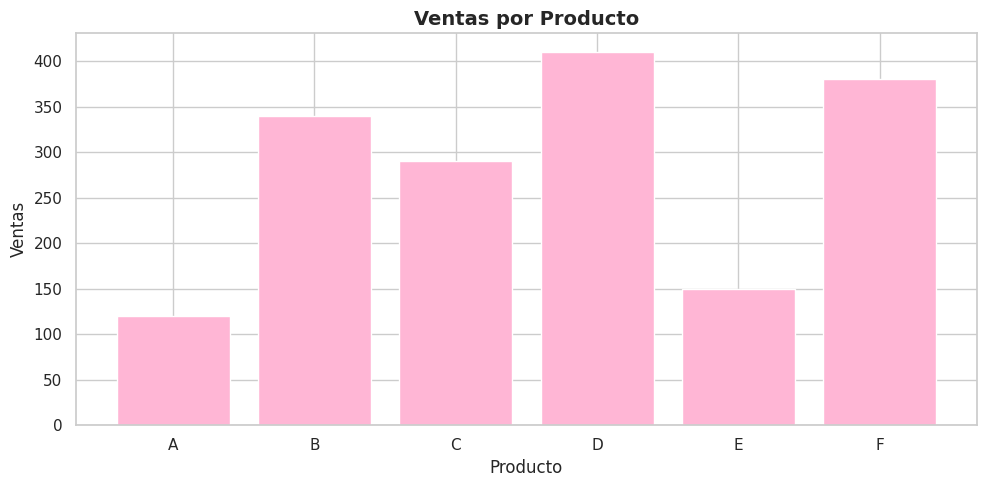

In [25]:
# Gráfico de barras de ventas por producto
plt.figure(figsize=(10,5))
plt.bar(df['Producto'], df['Ventas'], color='#ffb6d5')
plt.title('Ventas por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Pregunta 7 - Matplotlib (Gráfico comparativo)

Cree un gráfico de líneas que compare Ventas vs Costo por producto.

Use una leyenda adecuada y explique qué tendencia observa.

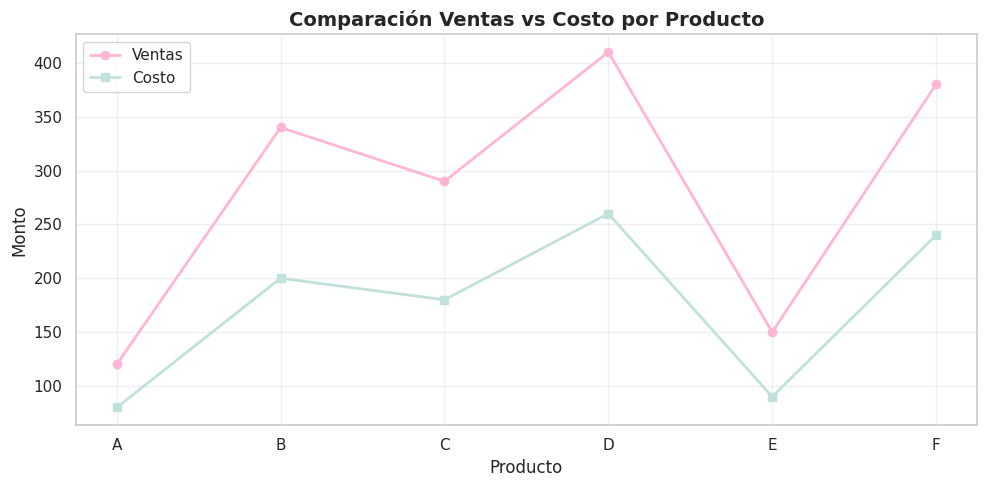

In [ ]:
# Gráfica de líneas comparando Ventas vs Costo
plt.figure(figsize=(10,5))
plt.plot(df['Producto'], df['Ventas'], marker='o', label='Ventas', color='#ffb6d5', linewidth=2)
plt.plot(df['Producto'], df['Costo'], marker='s', label='Costo', color='#c1e1dc', linewidth=2)
plt.title('Comparación Ventas vs Costo por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto')
plt.ylabel('Monto')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Tendencia: Las ventas siempre son mayores que los costos, lo que demuestra que todos los productos son rentables. Adicionalmente, el producto D presenta las ventas más altas, seguido de los productos F y B.